In [43]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import thinkdsp

Populating the interactive namespace from numpy and matplotlib


## Index
* [Leakage](#leakage)
* [Window](#window)

<a id="leakage"></a>
### Leakage
**FFT is based on the assumption that the signal is periodic**.(<span style="color:red;font-weight:bold">according to my current understanding in theory, DFT doesn't have such assumption. but FFT, the fast implementation of DFT, has such assumption on periodicity.</span>)  
One common problem of using FFT on non-periodic signal is dealing with <span style="color:darkorange">discontinuities at the beginning and end of a segment</span>. Because FFT assumes that the signal is periodic, it <span style="color:darkorange">implicitly connects the end of the segment back to the beginning to make a loop</span>. If the end does <span style="color:darkorange">not connect smoothly</span> to the beginning, the <span style="color:darkorange">discontinuity creates additional frequency components</span> in the segment that are not in the signal.

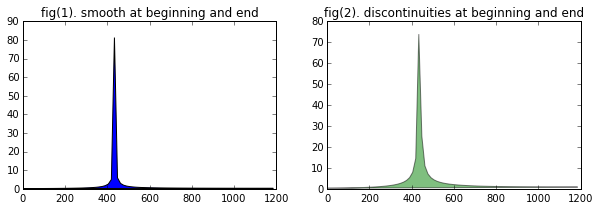

In [49]:
signal = thinkdsp.SinSignal(freq=440)
samplefreq = 2400

plt.figure(figsize=(10,3))

# ************************* smooth at beginning and end
plt.subplot(1,2,1)
whole_wave = signal.make_wave(duration=signal.period * 30,framerate=samplefreq)
whole_spectrum = whole_wave.make_spectrum()
plt.fill(whole_spectrum.fs,whole_spectrum.amps)
plt.title("fig(1). smooth at beginning and end")

# ************************* discontinuities at beginning and end
plt.subplot(1,2,2)
partial_wave = signal.make_wave(duration=signal.period * 30.25,framerate=samplefreq)
partial_spectrum = partial_wave.make_spectrum()
plt.fill(partial_spectrum.fs,partial_spectrum.amps,facecolor="g",alpha=0.5)
plt.title("fig(2). discontinuities at beginning and end")

Fig(2) demonstrate the "leakage phenomena". Comparing with fig(1), <span style="color:red">the peak area in fig(2) is wider</span>, there are additional components spread out from 240 to 640 Hz. This spread is called <span style="color:red">"spectral leakage"</span>, because some of the energy that is actually at the fundamental frequency leaks into other frequencies.

<a id="window"></a>
### Window

We can reduce leakage by **smoothing out the discontinuity between the beginning and end of the segment, and one way to do that is windowing**. A "window" is a function designed to transform a non-periodic segment into something that can pass for periodic.  
**Hamming** is a commonly-used,all-purpose window.

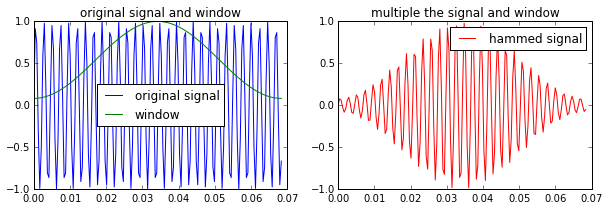

In [45]:
plt.figure(figsize=(10,3))

# ---------------- original signal and window
plt.subplot(1,2,1)
plt.plot(whole_wave.ts,whole_wave.ys,label="original signal")

window = np.hamming(len(whole_wave))
plt.plot(whole_wave.ts,window,label="window")

plt.title("original signal and window")
plt.legend(loc="best")

# ---------------- multiple the signal and window
plt.subplot(1,2,2)
ham_wave = whole_wave.copy()
ham_wave.hamming()
plt.plot(ham_wave.ts,ham_wave.ys,color="r",label="hammed signal")
plt.title("multiple the signal and window")
plt.legend(loc="best")

above-right plot shows the result of multiplying the window by the original signal. 
* Where the window is close to 1, the signal is unchanged. 
* Where the window is close to 0, the signal is attenuated.   

<span style="color:darkorange;font-weight:bold;font-size:1.2em">Because the window tapers at both ends, the end of the segment connects smoothly to the beginning.</span>

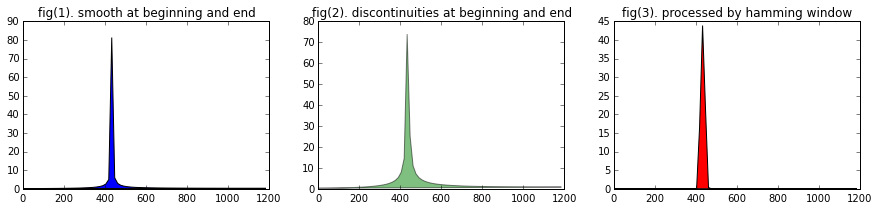

In [54]:
ham_spectrum = ham_wave.make_spectrum()

# *********************************** plot
plt.figure(figsize=(15,3))

plt.subplot(1,3,1)
plt.fill(whole_spectrum.fs,whole_spectrum.amps)
plt.title("fig(1). smooth at beginning and end")

plt.subplot(1,3,2)
plt.fill(partial_spectrum.fs,partial_spectrum.amps,facecolor="g",alpha=0.5)
plt.title("fig(2). discontinuities at beginning and end")

plt.subplot(1,3,3)
plt.fill(ham_spectrum.fs,ham_spectrum.amps,facecolor="r")
plt.title("fig(3). processed by hamming window")

the 3rd plot above shows the spectrum of the tapered signal. we can see that, windowing has reduced leakage substantially, but not completely.